##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____ **[0.1]** 284807 rows in total 
* What features in the dataset are present aside from the 28 main features?  _____ **[0.1]** Time, Amount & Class
* Which column contains the targets? **[0.1]** Class
* To what do the target values correspond?_____ **[0.1]** Whether the transaction is fraud or not

In [1]:
!pip install wget

zsh:1: command not found: pip


In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [3]:
!tar -zxvf creditcard.tar.gz

x creditcard.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.2]**



In [7]:
df_class=df[['Class']]

In [8]:
df_class_0=df_class.loc[df_class['Class']==0]
df_class_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284315 entries, 0 to 284806
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Class   284315 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


In [9]:
df_class_1=df_class.loc[df_class['Class']==1]
df_class_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 541 to 281674
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   492 non-null    int64
dtypes: int64(1)
memory usage: 7.7 KB


In [10]:
Class_0_percentage= (284315/284806)*100
print (Class_0_percentage)

99.8276019465882


In [11]:
Class_1_percentage= (100-Class_0_percentage)
print (Class_1_percentage)

0.17239805341179704


#### Data will be considered unbalanced due to the very large ratio of class 0 cases. This is the case due to there is less non-fradualant cases as compared to fradualant cases.

#### Balance/imbalance is important because the selected model cant get enough training sample to detect the less occuring events, thus effecting the accuracy of the model.

#### The same will happen with the K-NN classifier also as the model wont get enough sample data to train the model for the fradualant cases thus affecting overall accuracy and precision.Additionally, K-Means doesn’t take into account the covariance of the data

Next, split the dataset into a training (70%) and testing set (30%). Set the random state to 0.**[0.2]**

Make sure to separate out the column corresponding to the targets.

In [12]:
### Split the data  ###
#X_train, X_test, y_train, y_test = 0, 0, 0, 0

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['Class','Time','Amount'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [15]:
#Creating validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size=0.3)

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

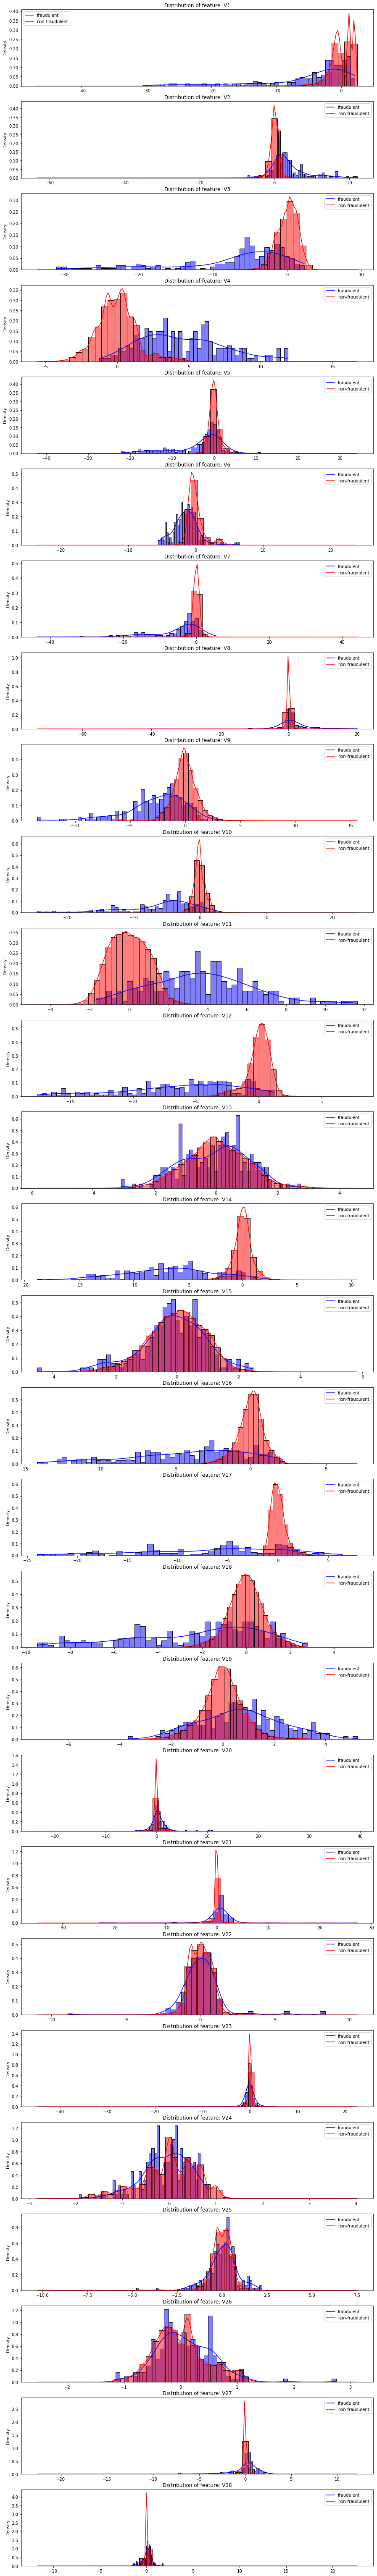

In [17]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[1]**

1. All the non-fraudulent transactions are having higher density which is around 40-55% as an average for all the features.
2. Maximum non- fraudulent transactions are concentrated around those density pattern.
3. Fraudulent transactions are relatively smaller in number and in average for all the features are not normally distributed either.
4. The variance of the fraudulent transactions are higher since the spread is more for all the features.

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes).  **[0.25]**
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  4. Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.25]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**

  6. If we fit our Gaussian on only non-fraudulent transactions instead of the whole training set (in step 1), how would that change our model's performance? why? Experiment and explain! **[0.75]**



In [18]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

In [19]:
V1=X_train['V1'].to_numpy()
V1=np.array(V1).reshape(-1,1)
gm.fit(V1)

GaussianMixture(random_state=0)

In [20]:
c1 = gm.score_samples(X_val[['V1']])

In [21]:
V2=X_train['V2'].to_numpy()
V2=np.array(V2).reshape(-1,1)
gm.fit(V2)
c2 = gm.score_samples(X_val[['V2']])

V3=X_train['V3'].to_numpy()
V3=np.array(V3).reshape(-1,1)
gm.fit(V3)
c3 = gm.score_samples(X_val[['V3']])

V4=X_train['V4'].to_numpy()
V4=np.array(V4).reshape(-1,1)
gm.fit(V4)
c4 = gm.score_samples(X_val[['V4']])

V5=X_train['V5'].to_numpy()
V5=np.array(V5).reshape(-1,1)
gm.fit(V5)
c5 = gm.score_samples(X_val[['V5']])

V6=X_train['V6'].to_numpy()
V6=np.array(V6).reshape(-1,1)
gm.fit(V6)
c6 = gm.score_samples(X_val[['V6']])

V7=X_train['V7'].to_numpy()
V7=np.array(V7).reshape(-1,1)
gm.fit(V7)
c7 = gm.score_samples(X_val[['V7']])

V8=X_train['V8'].to_numpy()
V8=np.array(V8).reshape(-1,1)
gm.fit(V8)
c8 = gm.score_samples(X_val[['V8']])

V9=X_train['V9'].to_numpy()
V9=np.array(V9).reshape(-1,1)
gm.fit(V9)
c9 = gm.score_samples(X_val[['V9']])

V10=X_train['V10'].to_numpy()
V10=np.array(V10).reshape(-1,1)
gm.fit(V10)
c10 = gm.score_samples(X_val[['V10']])

V11=X_train['V11'].to_numpy()
V11=np.array(V11).reshape(-1,1)
gm.fit(V11)
c11 = gm.score_samples(X_val[['V11']])

V12=X_train['V12'].to_numpy()
V12=np.array(V12).reshape(-1,1)
gm.fit(V12)
c12 = gm.score_samples(X_val[['V12']])

V13=X_train['V13'].to_numpy()
V13=np.array(V13).reshape(-1,1)
gm.fit(V13)
c13 = gm.score_samples(X_val[['V13']])

V14=X_train['V14'].to_numpy()
V14=np.array(V14).reshape(-1,1)
gm.fit(V14)
c14 = gm.score_samples(X_val[['V14']])

V15=X_train['V15'].to_numpy()
V15=np.array(V15).reshape(-1,1)
gm.fit(V15)
c15 = gm.score_samples(X_val[['V15']])

V16=X_train['V16'].to_numpy()
V16=np.array(V16).reshape(-1,1)
gm.fit(V16)
c16 = gm.score_samples(X_val[['V16']])

V17=X_train['V17'].to_numpy()
V17=np.array(V17).reshape(-1,1)
gm.fit(V17)
c17 = gm.score_samples(X_val[['V17']])

V18=X_train['V18'].to_numpy()
V18=np.array(V18).reshape(-1,1)
gm.fit(V18)
c18 = gm.score_samples(X_val[['V18']])

V19=X_train['V19'].to_numpy()
V19=np.array(V19).reshape(-1,1)
gm.fit(V19)
c19 = gm.score_samples(X_val[['V19']])

V20=X_train['V20'].to_numpy()
V20=np.array(V20).reshape(-1,1)
gm.fit(V20)
c20 = gm.score_samples(X_val[['V20']])

V21=X_train['V21'].to_numpy()
V21=np.array(V21).reshape(-1,1)
gm.fit(V21)
c21 = gm.score_samples(X_val[['V21']])

V22=X_train['V22'].to_numpy()
V22=np.array(V22).reshape(-1,1)
gm.fit(V22)
c22 = gm.score_samples(X_val[['V22']])

V23=X_train['V23'].to_numpy()
V23=np.array(V23).reshape(-1,1)
gm.fit(V23)
c23 = gm.score_samples(X_val[['V23']])

V24=X_train['V24'].to_numpy()
V24=np.array(V24).reshape(-1,1)
gm.fit(V24)
c24 = gm.score_samples(X_val[['V24']])

V25=X_train['V25'].to_numpy()
V25=np.array(V25).reshape(-1,1)
gm.fit(V25)
c25 = gm.score_samples(X_val[['V25']])

V26=X_train['V26'].to_numpy()
V26=np.array(V26).reshape(-1,1)
gm.fit(V26)
c26 = gm.score_samples(X_val[['V26']])

V27=X_train['V27'].to_numpy()
V27=np.array(V27).reshape(-1,1)
gm.fit(V27)
c27 = gm.score_samples(X_val[['V27']])

V28=X_train['V28'].to_numpy()
V28=np.array(V28).reshape(-1,1)
gm.fit(V28)
c28 = gm.score_samples(X_val[['V28']])

In [22]:
from sklearn.metrics import roc_auc_score
from tabulate import tabulate
data=[["AUC of Gaussian Mixture With Feature V1 = "  , format(roc_auc_score(y_val, 1-c1)  , ".3f")],
["AUC of Gaussian Mixture With Feature V2 = "  , format(roc_auc_score(y_val, 1-c2)  , ".3f")],
["AUC of Gaussian Mixture With Feature V3 = "  , format(roc_auc_score(y_val, 1-c3)  , ".3f")],
["AUC of Gaussian Mixture With Feature V4 = "  , format(roc_auc_score(y_val, 1-c4)  , ".3f")],
["AUC of Gaussian Mixture With Feature V5 = "  , format(roc_auc_score(y_val, 1-c5)  , ".3f")],
["AUC of Gaussian Mixture With Feature V6 = "  , format(roc_auc_score(y_val, 1-c6)  , ".3f")],
["AUC of Gaussian Mixture With Feature V7 = "  , format(roc_auc_score(y_val, 1-c7)  , ".3f")],
["AUC of Gaussian Mixture With Feature V8 = "  , format(roc_auc_score(y_val, 1-c8)  , ".3f")],
["AUC of Gaussian Mixture With Feature V9 = "  , format(roc_auc_score(y_val, 1-c9)  , ".3f")],
["AUC of Gaussian Mixture With Feature V10 = "  , format(roc_auc_score(y_val, 1-c10)  , ".3f")],
["AUC of Gaussian Mixture With Feature V11 = "  , format(roc_auc_score(y_val, 1-c11)  , ".3f")],
["AUC of Gaussian Mixture With Feature V12 = "  , format(roc_auc_score(y_val, 1-c12)  , ".3f")],
["AUC of Gaussian Mixture With Feature V13 = "  , format(roc_auc_score(y_val, 1-c13)  , ".3f")],
["AUC of Gaussian Mixture With Feature V14 = "  , format(roc_auc_score(y_val, 1-c14)  , ".3f")],
["AUC of Gaussian Mixture With Feature V15 = "  , format(roc_auc_score(y_val, 1-c15)  , ".3f")],
["AUC of Gaussian Mixture With Feature V16 = "  , format(roc_auc_score(y_val, 1-c16)  , ".3f")],
["AUC of Gaussian Mixture With Feature V17 = "  , format(roc_auc_score(y_val, 1-c17)  , ".3f")],
["AUC of Gaussian Mixture With Feature V18 = "  , format(roc_auc_score(y_val, 1-c18)  , ".3f")],
["AUC of Gaussian Mixture With Feature V19 = "  , format(roc_auc_score(y_val, 1-c19)  , ".3f")],
["AUC of Gaussian Mixture With Feature V20 = "  , format(roc_auc_score(y_val, 1-c20)  , ".3f")],
["AUC of Gaussian Mixture With Feature V21 = "  , format(roc_auc_score(y_val, 1-c21)  , ".3f")],
["AUC of Gaussian Mixture With Feature V22 = "  , format(roc_auc_score(y_val, 1-c22)  , ".3f")],
["AUC of Gaussian Mixture With Feature V23 = "  , format(roc_auc_score(y_val, 1-c23)  , ".3f")],
["AUC of Gaussian Mixture With Feature V24 = "  , format(roc_auc_score(y_val, 1-c24)  , ".3f")],
["AUC of Gaussian Mixture With Feature V25 = "  , format(roc_auc_score(y_val, 1-c25)  , ".3f")],
["AUC of Gaussian Mixture With Feature V26 = "  , format(roc_auc_score(y_val, 1-c26)  , ".3f")],
["AUC of Gaussian Mixture With Feature V27 = "  , format(roc_auc_score(y_val, 1-c27)  , ".3f")],
["AUC of Gaussian Mixture With Feature V28 = "  , format(roc_auc_score(y_val, 1-c28)  , ".3f")]]
print (tabulate(data, headers=["Features V[i]", "AUC Value"]))


Features V[i]                                 AUC Value
------------------------------------------  -----------
AUC of Gaussian Mixture With Feature V1 =         0.741
AUC of Gaussian Mixture With Feature V2 =         0.845
AUC of Gaussian Mixture With Feature V3 =         0.917
AUC of Gaussian Mixture With Feature V4 =         0.892
AUC of Gaussian Mixture With Feature V5 =         0.817
AUC of Gaussian Mixture With Feature V6 =         0.747
AUC of Gaussian Mixture With Feature V7 =         0.883
AUC of Gaussian Mixture With Feature V8 =         0.807
AUC of Gaussian Mixture With Feature V9 =         0.798
AUC of Gaussian Mixture With Feature V10 =        0.926
AUC of Gaussian Mixture With Feature V11 =        0.93
AUC of Gaussian Mixture With Feature V12 =        0.933
AUC of Gaussian Mixture With Feature V13 =        0.613
AUC of Gaussian Mixture With Feature V14 =        0.976
AUC of Gaussian Mixture With Feature V15 =        0.522
AUC of Gaussian Mixture With Feature V16 =       

#### The best feature with maximum AUC value is V14 and can be used to distinguish between fraudulent and non-fraudulent transactions.

In [23]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,roc_curve

In [24]:
from numpy import quantile, where, random
threshold_list=[]
C_list = [-40,-10,-5,-4,-3,-2,-1,0,1] 
for C in C_list :
    threshold= [C]
    fraud = where(c14<threshold)[0]
    X_t=V14[fraud]
    xx=len(X_t)
    f1 = f1_score(y_val[:xx], gm.predict_proba(X_t)[:,0] )
    #threshold_list.append((C, f1_score))
    print('For a threshold of ',C,' the F1_Score value is ', '%.4f' % f1)
    #print(classification_report(y_val[:xx], gm.predict_proba(X_t)[:,0] ))

For a threshold of  -40  the F1_Score value is  0.0000
For a threshold of  -10  the F1_Score value is  0.0077
For a threshold of  -5  the F1_Score value is  0.0093
For a threshold of  -4  the F1_Score value is  0.0072
For a threshold of  -3  the F1_Score value is  0.0048
For a threshold of  -2  the F1_Score value is  0.0041
For a threshold of  -1  the F1_Score value is  0.0040
For a threshold of  0  the F1_Score value is  0.0038
For a threshold of  1  the F1_Score value is  0.0038


In [25]:
#Part 6
V1_1=X_train['V1'][y_train==0].to_numpy()
V1_1=np.array(V1_1).reshape(-1,1)
gm.fit(V1_1)

GaussianMixture(random_state=0)

In [26]:
c1_1 = gm.score_samples(X_val[['V1']])

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  0  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.200  and the recall is  0.018
For a k of  100  the precision is  0.160  and the recall is  0.142
For a k of  500  the precision is  0.048  and the recall is  0.212


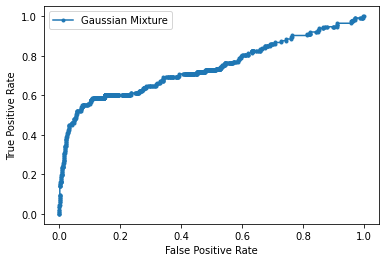

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     59697
           1       0.05      0.21      0.08       113

    accuracy                           0.99     59810
   macro avg       0.52      0.60      0.54     59810
weighted avg       1.00      0.99      0.99     59810

AUC of Gaussian Mixture-Feature V1 ,only non faudulent =  0.741
0.07830342577487766


In [27]:
for i in [-40,-10,0,10,100,500]: 
   mn_gm1_1 = sorted(c1_1)[i] #We sort the points by probability
   precision1_1 = precision_score(y_val, c1_1 < mn_gm1_1) # compare y_val labels to our picks using precision
   recall1_1 = recall_score(y_val, c1_1 < mn_gm1_1) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision1_1,' and the recall is ', '%.3f' % recall1_1) 

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-c1_1)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, c1_1 < mn_gm1_1))
print ("AUC of Gaussian Mixture-Feature V1 ,only non faudulent = " , format(  roc_auc_score(y_val, 1-c1_1)  , ".3f")  )
print(f1_score(y_val, c1_1 < mn_gm1_1))

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  10  the precision is  0.200  and the recall is  0.018
For a k of  100  the precision is  0.160  and the recall is  0.142
For a k of  500  the precision is  0.048  and the recall is  0.212


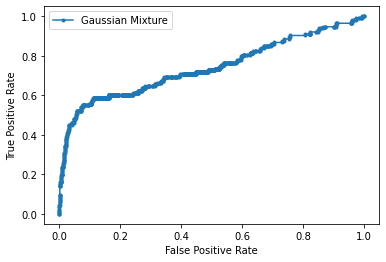

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     59697
           1       0.05      0.21      0.08       113

    accuracy                           0.99     59810
   macro avg       0.52      0.60      0.54     59810
weighted avg       1.00      0.99      0.99     59810

AUC of Gaussian Mixture-Model V1, all data =  0.741
0.07830342577487766


In [28]:
# Comapring with feature V1 of all set fitted model
for i in [-40,-10,10,100,500]: 
   mn_gm1_2 = sorted(c1)[i] #We sort the points by probability
   precision1_2 = precision_score(y_val, c1 < mn_gm1_2) # compare y_val labels to our picks using precision
   recall1_2 = recall_score(y_val, c1 < mn_gm1_2) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision1_2,' and the recall is ', '%.3f' % recall1_2) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-c1)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, c1 < mn_gm1_2))
print ("AUC of Gaussian Mixture-Model V1, all data = " , format(  roc_auc_score(y_val, 1-c1)  , ".3f")  )
print(f1_score(y_val, c1 < mn_gm1_2))

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  0  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  1.000  and the recall is  0.088
For a k of  100  the precision is  0.710  and the recall is  0.628
For a k of  500  the precision is  0.192  and the recall is  0.850


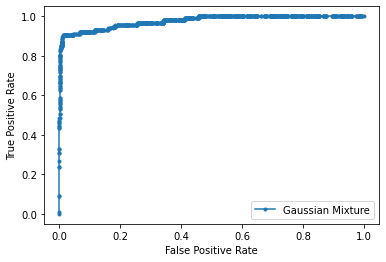

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     59697
           1       0.19      0.85      0.31       113

    accuracy                           0.99     59810
   macro avg       0.60      0.92      0.65     59810
weighted avg       1.00      0.99      1.00     59810

AUC of Gaussian Mixture-Feature V14 ,only non faudulent =  0.976
0.31321370309951063


In [29]:
# Trying on features 14
V14_1=X_train['V14'][y_train==0].to_numpy()
V14_1=np.array(V14_1).reshape(-1,1)
gm.fit(V14_1)

c14_1 = gm.score_samples(X_val[['V14']])

for i in [-40,-10,0,10,100,500]: 
   mn_gm14_1 = sorted(c14_1)[i] #We sort the points by probability
   precision14_1 = precision_score(y_val, c14_1 < mn_gm14_1) # compare y_val labels to our picks using precision
   recall14_1 = recall_score(y_val, c14_1 < mn_gm14_1) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision14_1,' and the recall is ', '%.3f' % recall14_1) 

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-c14_1)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, c14_1 < mn_gm14_1))
print ("AUC of Gaussian Mixture-Feature V14 ,only non faudulent = " , format(  roc_auc_score(y_val, 1-c14_1)  , ".3f")  )
print(f1_score(y_val, c14_1 < mn_gm14_1))

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  10  the precision is  1.000  and the recall is  0.088
For a k of  100  the precision is  0.710  and the recall is  0.628
For a k of  500  the precision is  0.192  and the recall is  0.850


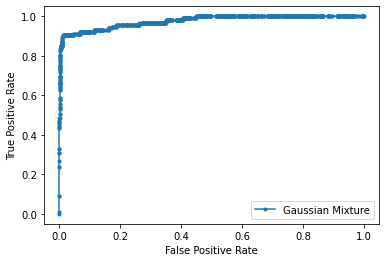

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     59697
           1       0.19      0.85      0.31       113

    accuracy                           0.99     59810
   macro avg       0.60      0.92      0.65     59810
weighted avg       1.00      0.99      1.00     59810

AUC of Gaussian Mixture-Model V14, all data =  0.976
0.31321370309951063


In [30]:
# Comapring with feature V14 of all set fitted model
for i in [-40,-10,10,100,500]: 
   mn_gm14_2 = sorted(c14)[i] #We sort the points by probability
   precision14_2 = precision_score(y_val, c14 < mn_gm14_2) # compare y_val labels to our picks using precision
   recall14_2 = recall_score(y_val, c14 < mn_gm14_2) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision14_2,' and the recall is ', '%.3f' % recall14_2) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-c14)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, c14 < mn_gm14_2))
print ("AUC of Gaussian Mixture-Model V14, all data = " , format(  roc_auc_score(y_val, 1-c14)  , ".3f")  )
print(f1_score(y_val, c14 < mn_gm14_2))

#### Looking and experimenting for 2 single features, it is been concluded that it barely making any differneces in the performance with respect to different type of fitting. The reason for this can be the unbalanced dataset and less features selection

## **Part 3: Multiple feature model with one Gaussian distribution: [2.5 Marks]**
This part is similar to Part 2, but here we will pick two features and set the number of components visually.

 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the data-points based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.5]**
 5. Fit your Gaussian model on all the data-points. **[0.25]**
 6. Compute AUC **[0.25]**
 7. Pick 3 new sets of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC.
 9. Find a threshold to maximize your F1 Score.**[0.25]**
 10. Plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**




Text(0.5, 1.0, 'Distribution of feature:')

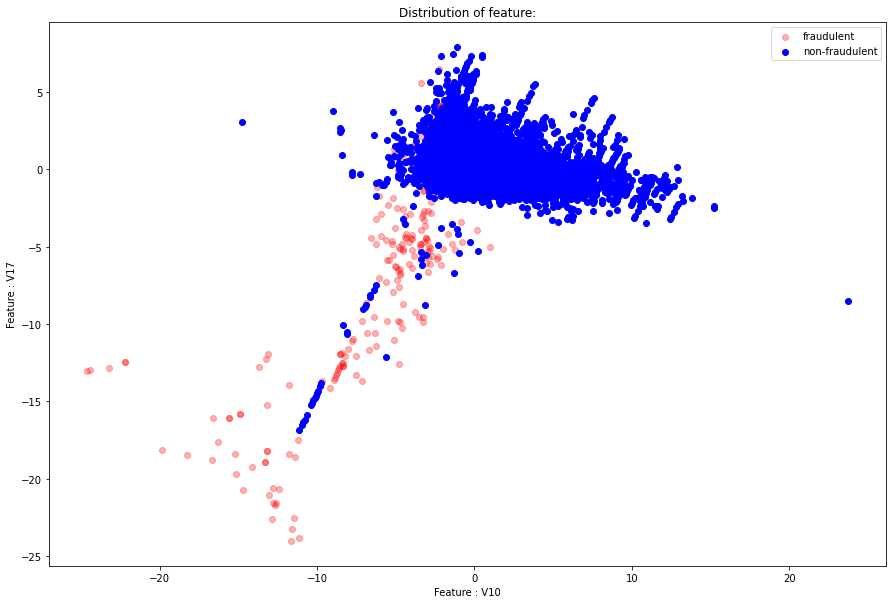

In [31]:
from matplotlib import pyplot
#Selected two features are V10 & V17
plt.figure(figsize=(15,10))
plt.scatter(X_train['V10'][y_train==1],X_train['V17'][y_train==1],color="red", alpha=0.3)
plt.scatter(X_train['V10'][y_train==0],X_train['V17'][y_train==0],color="blue",  alpha=1)
plt.legend(['fraudulent', 'non-fraudulent'],loc='best')
plt.xlabel('Feature : V10')
plt.ylabel('Feature : V17')
plt.title('Distribution of feature:' )

#### Based on the visual analysis, the selected n_components should be 2, as i can see 2 major clusterring

In [32]:
#Fitting all the data points 
gm_part2=GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)

In [33]:
gm_part2.fit(X_train)

GaussianMixture(n_components=2, random_state=0)

In [34]:
AUC_part2=roc_auc_score(y_val, gm_part2.predict(X_val))
print('The AUC value:', '%.3f' %  AUC_part2)

The AUC value: 0.688


In [35]:
print(classification_report(y_val, gm_part2.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63     59697
           1       0.00      0.91      0.01       113

    accuracy                           0.46     59810
   macro avg       0.50      0.69      0.32     59810
weighted avg       1.00      0.46      0.63     59810



In [36]:
#set=1 of features
set1_1=X_train[['V3','V2']]
set1_2=X_train[['V5','V4']]

Text(0.5, 1.0, 'Distribution of feature:')

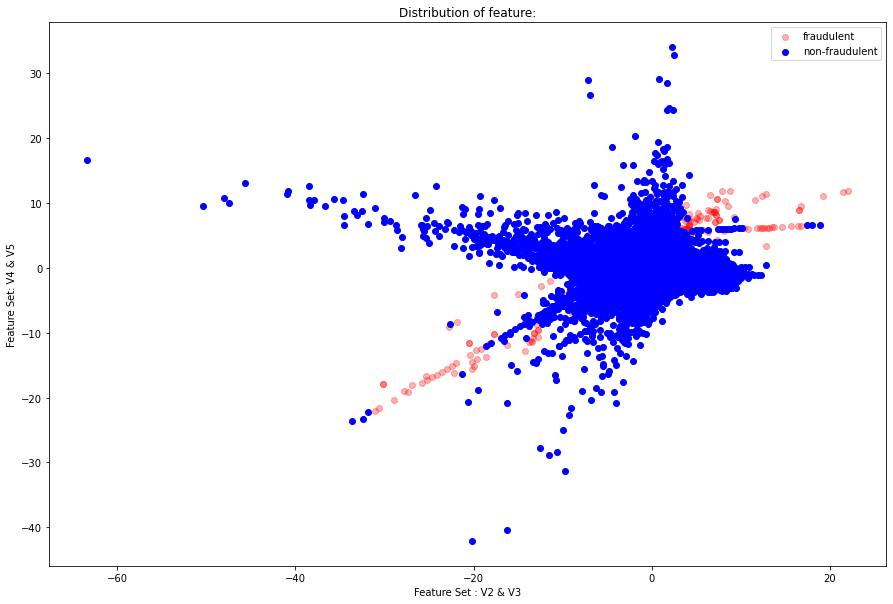

In [37]:
plt.figure(figsize=(15,10))
plt.scatter(set1_1[y_train==1],set1_2[y_train==1],color="red", alpha=0.3)
plt.scatter(set1_1[y_train==0],set1_2[y_train==0],color="blue",  alpha=1)
plt.legend(['fraudulent', 'non-fraudulent'],loc='best')
plt.xlabel('Feature Set : V2 & V3')
plt.ylabel('Feature Set: V4 & V5')
plt.title('Distribution of feature:' )

Based on visual analysis, n_component=1

In [38]:
gm_part2_1=GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm_part2_1.fit(X_train)

GaussianMixture(random_state=0)

In [39]:
AUC_part2_1=roc_auc_score(y_val, gm_part2_1.predict(X_val))
print('The AUC value of Set-1 features:', '%.3f' %  AUC_part2_1)

The AUC value of Set-1 features: 0.500


In [40]:
print(classification_report(y_val, gm_part2_1.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59697
           1       0.00      0.00      0.00       113

    accuracy                           1.00     59810
   macro avg       0.50      0.50      0.50     59810
weighted avg       1.00      1.00      1.00     59810



The AUC value of Set-2 features: 0.327
              precision    recall  f1-score   support

           0       1.00      0.03      0.06     59697
           1       0.00      0.91      0.01       113
           2       0.00      0.00      0.00         0

    accuracy                           0.03     59810
   macro avg       0.33      0.31      0.02     59810
weighted avg       1.00      0.03      0.06     59810



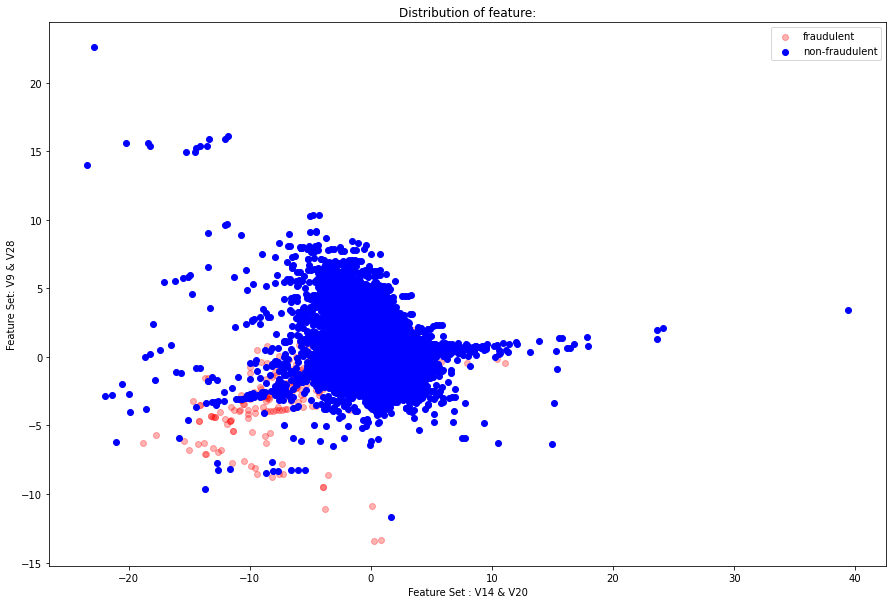

In [41]:
#set=2 of features
set2_1=X_train[['V14','V20']]
set2_2=X_train[['V9','V28']]

plt.figure(figsize=(15,10))
plt.scatter(set2_1[y_train==1],set2_2[y_train==1],color="red", alpha=0.3)
plt.scatter(set2_1[y_train==0],set2_2[y_train==0],color="blue",  alpha=1)
plt.legend(['fraudulent', 'non-fraudulent'],loc='best')
plt.xlabel('Feature Set : V14 & V20')
plt.ylabel('Feature Set: V9 & V28')
plt.title('Distribution of feature:' )

gm_part2_2=GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm_part2_2.fit(X_train)

AUC_part2_2=roc_auc_score(y_val, gm_part2_2.predict(X_val))
print('The AUC value of Set-2 features:', '%.3f' %  AUC_part2_2)

print(classification_report(y_val, gm_part2_2.predict(X_val)))

The AUC value of Set-3 features: 0.688
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     59697
           1       0.00      0.91      0.01       113

    accuracy                           0.46     59810
   macro avg       0.50      0.69      0.32     59810
weighted avg       1.00      0.46      0.63     59810



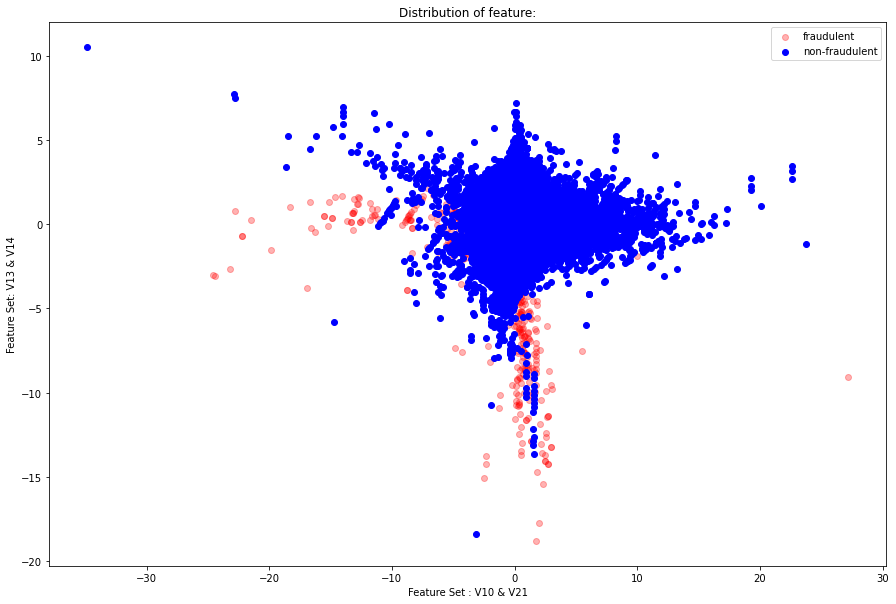

In [42]:
#set=3 of features

set3_1=X_train[['V10','V21']]
set3_2=X_train[['V13','V14']]

plt.figure(figsize=(15,10))
plt.scatter(set3_1[y_train==1],set3_2[y_train==1],color="red", alpha=0.3)
plt.scatter(set3_1[y_train==0],set3_2[y_train==0],color="blue",  alpha=1)
plt.legend(['fraudulent', 'non-fraudulent'],loc='best')
plt.xlabel('Feature Set : V10 & V21')
plt.ylabel('Feature Set: V13 & V14')
plt.title('Distribution of feature:' )

gm_part2_3=GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm_part2_3.fit(X_train)

AUC_part2_3=roc_auc_score(y_val, gm_part2_3.predict(X_val))
print('The AUC value of Set-3 features:', '%.3f' %  AUC_part2_3)
print(classification_report(y_val, gm_part2_3.predict(X_val)))

#### The features set with maximum AUC value is Set 3

In [43]:
set_1_ss=X_train[['V10','V13','V14','V21']].to_numpy()
set_1_ss=np.array(set_1_ss).reshape(-1,1)
gm_part2_1.fit(set_1_ss)
c_1_ss = gm_part2_1.score_samples(set_1_ss)
c_1_ss

array([-0.95768089, -0.94507333, -1.00479555, ..., -0.90814327,
       -0.88442568, -0.87327906])

In [44]:
threshold_list_1=[]
C_list_1 = [-30,-20,-10,-5] 
for C in C_list_1 :
    threshold_1= [C]
    fraud_1 = np.nonzero(c_1_ss<threshold_1)[0]
    X_t1=set_1_ss[fraud_1]
    xx1=len(X_t1)
    f1_set_1 = f1_score(y_train[:xx1], gm_part2_1.predict_proba(X_t1)[:,0] )
    #threshold_list.append((C, f1_score))
    print('For a threshold of ',C,' the F1_Score value is ', '%.4f' % f1_set_1)

For a threshold of  -30  the F1_Score value is  0.0000
For a threshold of  -20  the F1_Score value is  0.0016
For a threshold of  -10  the F1_Score value is  0.0025
For a threshold of  -5  the F1_Score value is  0.0021


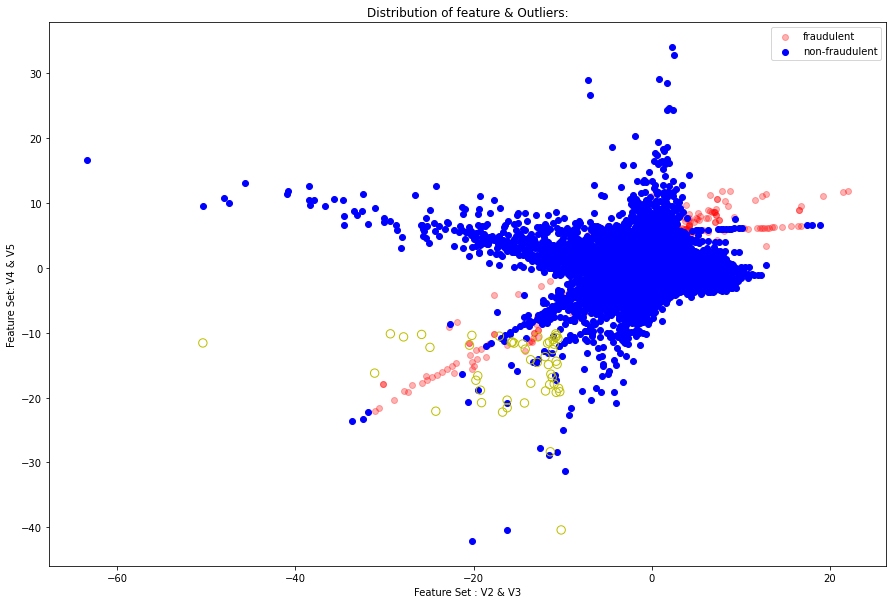

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(set1_1[y_train==1],set1_2[y_train==1],color="red", alpha=0.3)
plt.scatter(set1_1[y_train==0],set1_2[y_train==0],color="blue",  alpha=1)
plt.legend(['fraudulent', 'non-fraudulent'],loc='best')
plt.xlabel('Feature Set : V2 & V3')
plt.ylabel('Feature Set: V4 & V5')
plt.title('Distribution of feature & Outliers:' )

threshold= -10

out1=X_train[['V3','V2']].to_numpy()
out1=np.array(out1).reshape(-2,2)
out1=out1[out1<threshold]
out2=X_train[['V5','V4']].to_numpy()
out2=np.array(out2).reshape(-2,2)
out2=out2[out2<threshold]

plt.scatter(out1[:50],out2[:50],marker="o",facecolor= "none",edgecolor="y",s=70)
#plt.legend('outliers')
plt.show()

## **Part 4: Single feature model with two Gaussian distributions. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **whole training set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get? Which feature and what c? **[1]**

In [46]:
G1=GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

In [47]:
#feature V20 /non fraudulent transaction
v20_1=X_train[['V20']][y_train==0].to_numpy()
v20_1=np.array(v20_1).reshape(-1,1)

In [48]:
G1.fit(v20_1)

GaussianMixture(random_state=0)

In [49]:
G2=GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

In [50]:
#feature V20 /fraudulent transaction
v20_2=X_train[['V20']][y_train==1].to_numpy()
v20_2=np.array(v20_2).reshape(-1,1)

In [51]:
G2.fit(v20_2)

GaussianMixture(random_state=0)

In [52]:
S1=G1.score_samples(X_train[['V20']])

In [53]:
S1

array([-0.69218733, -1.23592749, -0.66311413, ..., -0.69781673,
       -0.74856714, -0.6657105 ])

In [54]:
S2=G2.score_samples(X_train[['V20']])

In [55]:
S2

array([-1.43421827, -1.6820142 , -1.37605541, ..., -1.4384612 ,
       -1.47083117, -1.37364157])

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC (if applicable) and the best F1 score for each one. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables and plots. **[4]**


**HINT !**

Want an F1 score above $85\%$? Try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

#### Model-1- All features, n_component=1

In [56]:
gm1=GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

In [57]:
gm1.fit(X_train)

GaussianMixture(random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.250  and the recall is  0.221


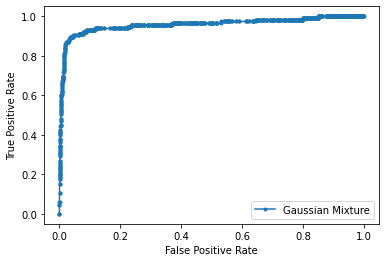

In [58]:
#This part outputs the precision and recall on the validation set

p_gm1 = gm1.score_samples(X_val) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,1, 10, 100]: 
   mn_gm1 = sorted(p_gm1)[i] #We sort the points by probability
   precision1 = precision_score(y_val, p_gm1 < mn_gm1) # compare y_val labels to our picks using precision
   recall1 = recall_score(y_val, p_gm1 < mn_gm1) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision1,' and the recall is ', '%.3f' % recall1) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm1)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [59]:
print ("AUC of Gaussian Mixture-Model 1 = " , format(  roc_auc_score(y_val, 1-p_gm1)  , ".3f")  )

AUC of Gaussian Mixture-Model 1 =  0.958


In [60]:
print(classification_report(y_val, p_gm1 < mn_gm1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59697
           1       0.25      0.22      0.23       113

    accuracy                           1.00     59810
   macro avg       0.62      0.61      0.62     59810
weighted avg       1.00      1.00      1.00     59810



In [61]:
print(f1_score(y_val, p_gm1 < mn_gm1))

0.2347417840375587


#### Model-2, All features, n_components=5

In [62]:
gm2=GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm2.fit(X_train)

GaussianMixture(n_components=5, random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.320  and the recall is  0.283


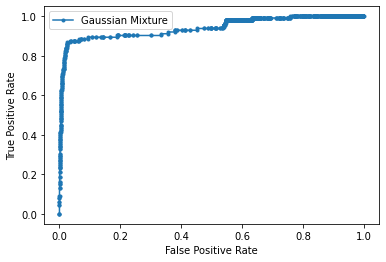

In [63]:
p_gm2 = gm2.score_samples(X_val) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,1, 10, 100]: 
   mn_gm2 = sorted(p_gm2)[i] #We sort the points by probability
   precision2 = precision_score(y_val, p_gm2 < mn_gm2) # compare y_val labels to our picks using precision
   recall2 = recall_score(y_val, p_gm2 < mn_gm2) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision2,' and the recall is ', '%.3f' % recall2) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm2)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [64]:
print ("AUC of Gaussian Mixture-Model 2 = " , format(  roc_auc_score(y_val, 1-p_gm2)  , ".3f")  )

AUC of Gaussian Mixture-Model 2 =  0.942


In [65]:
print(classification_report(y_val, p_gm2 < mn_gm2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59697
           1       0.32      0.28      0.30       113

    accuracy                           1.00     59810
   macro avg       0.66      0.64      0.65     59810
weighted avg       1.00      1.00      1.00     59810



In [66]:
print(f1_score(y_val, p_gm2 < mn_gm2))

0.30046948356807507


#### Model-3, All features, n_components=20

In [67]:
gm3=GaussianMixture(n_components = 20, covariance_type = 'full', random_state=0)
gm3.fit(X_train)

GaussianMixture(n_components=20, random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.160  and the recall is  0.142


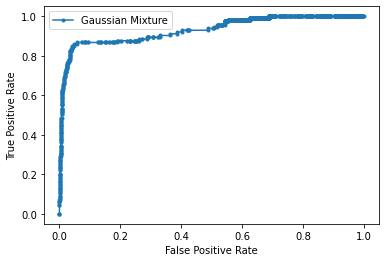

In [68]:
p_gm3 = gm3.score_samples(X_val) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,1, 10, 100]: 
   mn_gm3 = sorted(p_gm3)[i] #We sort the points by probability
   precision3 = precision_score(y_val, p_gm3 < mn_gm3) # compare y_val labels to our picks using precision
   recall3 = recall_score(y_val, p_gm3 < mn_gm3) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision3,' and the recall is ', '%.3f' % recall3) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm3)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [69]:
print ("AUC of Gaussian Mixture-Model 3 = " , format(  roc_auc_score(y_val, 1-p_gm3)  , ".3f")  )

AUC of Gaussian Mixture-Model 3 =  0.932


In [70]:
print(classification_report(y_val, p_gm3 < mn_gm3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59697
           1       0.16      0.14      0.15       113

    accuracy                           1.00     59810
   macro avg       0.58      0.57      0.57     59810
weighted avg       1.00      1.00      1.00     59810



In [71]:
print(f1_score(y_val, p_gm3 < mn_gm3))

0.15023474178403753


#### Model-4, Three Features, n_component=2

In [72]:
gm4=GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)

In [73]:
gm4.fit(X_train[['V2','V5','V9']])

GaussianMixture(n_components=2, random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  100  the precision is  0.140  and the recall is  0.124
For a k of  500  the precision is  0.078  and the recall is  0.345
For a k of  1000  the precision is  0.052  and the recall is  0.460


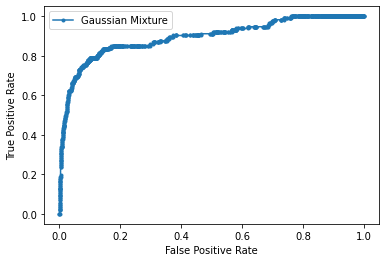

In [74]:
p_gm4 = gm4.score_samples(X_val[['V2','V5','V9']]) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,100,500,1000]: 
   mn_gm4 = sorted(p_gm4)[i] #We sort the points by probability
   precision4 = precision_score(y_val, p_gm4 < mn_gm4) # compare y_val labels to our picks using precision
   recall4 = recall_score(y_val, p_gm4 < mn_gm4) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision4,' and the recall is ', '%.3f' % recall4) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm4)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [75]:
print ("AUC of Gaussian Mixture-Model 4 = " , format(  roc_auc_score(y_val, 1-p_gm4)  , ".3f")  )

AUC of Gaussian Mixture-Model 4 =  0.894


In [76]:
print(classification_report(y_val, p_gm4 < mn_gm4))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     59697
           1       0.05      0.46      0.09       113

    accuracy                           0.98     59810
   macro avg       0.53      0.72      0.54     59810
weighted avg       1.00      0.98      0.99     59810



In [77]:
print(f1_score(y_val, p_gm4 < mn_gm4))

0.09344115004492363


#### Model-5, 5 Features, n_component=8

In [78]:
gm5=GaussianMixture(n_components = 8, covariance_type = 'full', random_state=0)

In [79]:
gm5.fit(X_train[['V12','V15','V19','V3','V14']])

GaussianMixture(n_components=8, random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  100  the precision is  0.360  and the recall is  0.319
For a k of  500  the precision is  0.184  and the recall is  0.814
For a k of  1000  the precision is  0.102  and the recall is  0.903


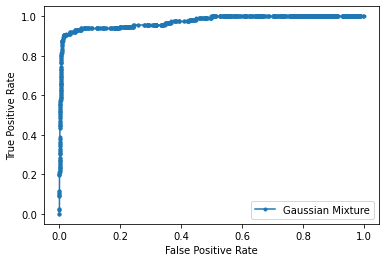

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     59697
           1       0.10      0.90      0.18       113

    accuracy                           0.98     59810
   macro avg       0.55      0.94      0.59     59810
weighted avg       1.00      0.98      0.99     59810

AUC of Gaussian Mixture-Model 5 =  0.973
0.18328840970350402


In [80]:
p_gm5 = gm5.score_samples(X_val[['V12','V15','V19','V3','V14']]) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,100,500,1000]: 
   mn_gm5 = sorted(p_gm5)[i] #We sort the points by probability
   precision5 = precision_score(y_val, p_gm5 < mn_gm5) # compare y_val labels to our picks using precision
   recall5 = recall_score(y_val, p_gm5 < mn_gm5) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision5,' and the recall is ', '%.3f' % recall5) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm5)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, p_gm5 < mn_gm5))
print ("AUC of Gaussian Mixture-Model 5 = " , format(  roc_auc_score(y_val, 1-p_gm5)  , ".3f")  )
print(f1_score(y_val, p_gm5 < mn_gm5))

#### Model-6, All features,n_components=3, Non Faudulent cases

In [81]:
gm6=GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)

In [82]:
gm6.fit(X_train[y_train==0])

GaussianMixture(n_components=3, random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  10  the precision is  1.000  and the recall is  0.088
For a k of  100  the precision is  0.560  and the recall is  0.496
For a k of  500  the precision is  0.188  and the recall is  0.832
For a k of  1000  the precision is  0.096  and the recall is  0.850


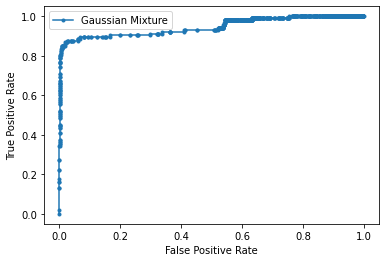

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     59697
           1       0.10      0.85      0.17       113

    accuracy                           0.98     59810
   macro avg       0.55      0.92      0.58     59810
weighted avg       1.00      0.98      0.99     59810

AUC of Gaussian Mixture-Model 6 =  0.946
0.1725067385444744


In [83]:
p_gm6 = gm6.score_samples(X_val) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,10,100,500,1000]: 
   mn_gm6 = sorted(p_gm6)[i] #We sort the points by probability
   precision6 = precision_score(y_val, p_gm6 < mn_gm6) # compare y_val labels to our picks using precision
   recall6 = recall_score(y_val, p_gm6 < mn_gm6) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision6,' and the recall is ', '%.3f' % recall6) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm6)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, p_gm6 < mn_gm6))
print ("AUC of Gaussian Mixture-Model 6 = " , format(  roc_auc_score(y_val, 1-p_gm6)  , ".3f")  )
print(f1_score(y_val, p_gm6 < mn_gm6))

#### Model-7, All features,n_components=3, Faudulent cases

In [84]:
gm7=GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)

In [85]:
gm7.fit(X_train[y_train==1])

GaussianMixture(n_components=3, random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  0.850
For a k of  -10  the precision is  0.002  and the recall is  0.912
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.000  and the recall is  0.000
For a k of  500  the precision is  0.000  and the recall is  0.000
For a k of  1000  the precision is  0.000  and the recall is  0.000


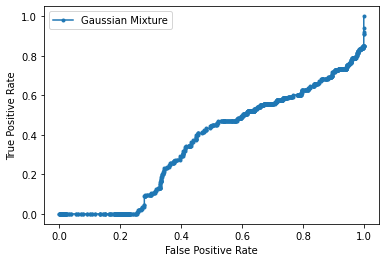

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     59697
           1       0.00      0.00      0.00       113

    accuracy                           0.98     59810
   macro avg       0.50      0.49      0.50     59810
weighted avg       1.00      0.98      0.99     59810

AUC of Gaussian Mixture-Model 7 =  0.364
0.0


In [86]:
p_gm7 = gm7.score_samples(X_val) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,10,100,500,1000]: 
   mn_gm7 = sorted(p_gm7)[i] #We sort the points by probability
   precision7 = precision_score(y_val, p_gm7 < mn_gm7) # compare y_val labels to our picks using precision
   recall7 = recall_score(y_val, p_gm7 < mn_gm7) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision7,' and the recall is ', '%.3f' % recall7) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm7)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, p_gm7 < mn_gm7))
print ("AUC of Gaussian Mixture-Model 7 = " , format(  roc_auc_score(y_val, 1-p_gm7)  , ".3f")  )
print(f1_score(y_val, p_gm7 < mn_gm7))

#### Model-8, 5 features,n_components=6, Faudulent cases

In [87]:
gm8=GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0)

In [88]:
gm8.fit(X_train[['V2','V23','V10','V14','V20']][y_train==1])

GaussianMixture(n_components=6, random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  0.947
For a k of  -10  the precision is  0.002  and the recall is  0.956
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.000  and the recall is  0.000
For a k of  500  the precision is  0.000  and the recall is  0.000


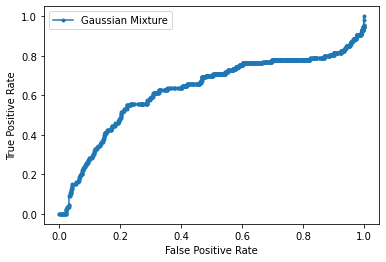

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     59697
           1       0.00      0.00      0.00       113

    accuracy                           0.99     59810
   macro avg       0.50      0.50      0.50     59810
weighted avg       1.00      0.99      0.99     59810

AUC of Gaussian Mixture-Model 8 =  0.628
0.0


In [89]:
p_gm8 = gm8.score_samples(X_val[['V2','V23','V10','V14','V20']]) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,10,100,500]: 
   mn_gm8 = sorted(p_gm8)[i] #We sort the points by probability
   precision8 = precision_score(y_val, p_gm8 < mn_gm8) # compare y_val labels to our picks using precision
   recall8 = recall_score(y_val, p_gm8 < mn_gm8) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision8,' and the recall is ', '%.3f' % recall8) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm8)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, p_gm8 < mn_gm8))
print ("AUC of Gaussian Mixture-Model 8 = " , format(  roc_auc_score(y_val, 1-p_gm8)  , ".3f")  )
print(f1_score(y_val, p_gm8 < mn_gm8))

#### Model-9, 10 features,n_components=2, Non-Faudulent cases

In [90]:
gm9=GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)

In [91]:
gm9.fit(X_train[['V2','V23','V10','V14','V20','V4','V24','V8','V28','V13']][y_train==0])

GaussianMixture(n_components=2, random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  10  the precision is  0.100  and the recall is  0.009
For a k of  100  the precision is  0.440  and the recall is  0.389
For a k of  500  the precision is  0.178  and the recall is  0.788


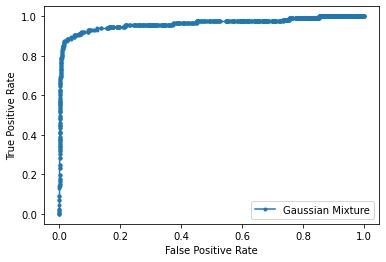

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     59697
           1       0.18      0.79      0.29       113

    accuracy                           0.99     59810
   macro avg       0.59      0.89      0.64     59810
weighted avg       1.00      0.99      1.00     59810

AUC of Gaussian Mixture-Model 9 =  0.962
0.2903752039151713


In [92]:
p_gm9 = gm9.score_samples(X_val[['V2','V23','V10','V14','V20','V4','V24','V8','V28','V13']]) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,10,100,500]: 
   mn_gm9 = sorted(p_gm9)[i] #We sort the points by probability
   precision9 = precision_score(y_val, p_gm9 < mn_gm9) # compare y_val labels to our picks using precision
   recall9 = recall_score(y_val, p_gm9 < mn_gm9) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision9,' and the recall is ', '%.3f' % recall9) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm9)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, p_gm9 < mn_gm9))
print ("AUC of Gaussian Mixture-Model 9 = " , format(  roc_auc_score(y_val, 1-p_gm9)  , ".3f")  )
print(f1_score(y_val, p_gm9 < mn_gm9))

#### Model-10, 15 features,n_components=1, Non-Faudulent cases

In [93]:
gm10=GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

In [94]:
gm10.fit(X_train[['V2','V23','V10','V14','V20','V4','V24','V8','V28','V13','V11','V21','V19','V25','V7']][y_train==0])

GaussianMixture(random_state=0)

For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  10  the precision is  0.500  and the recall is  0.044
For a k of  100  the precision is  0.250  and the recall is  0.221
For a k of  500  the precision is  0.128  and the recall is  0.566


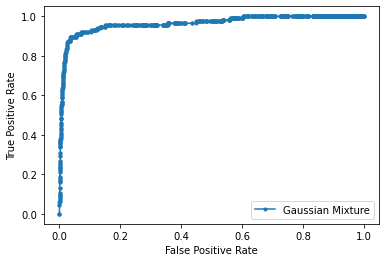

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     59697
           1       0.13      0.57      0.21       113

    accuracy                           0.99     59810
   macro avg       0.56      0.78      0.60     59810
weighted avg       1.00      0.99      0.99     59810

AUC of Gaussian Mixture-Model 10 =  0.965
0.20880913539967375


In [95]:
p_gm10 = gm10.score_samples(X_val[['V2','V23','V10','V14','V20','V4','V24','V8','V28','V13','V11','V21','V19','V25','V7']]) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,10,100,500]: 
   mn_gm10 = sorted(p_gm10)[i] #We sort the points by probability
   precision10 = precision_score(y_val, p_gm10 < mn_gm10) # compare y_val labels to our picks using precision
   recall10 = recall_score(y_val, p_gm10 < mn_gm10) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision10,' and the recall is ', '%.3f' % recall10) 


fpr_gm, tpr_gm, _ = roc_curve(y_val, 1-p_gm10)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(classification_report(y_val, p_gm10 < mn_gm10))
print ("AUC of Gaussian Mixture-Model 10 = " , format(  roc_auc_score(y_val, 1-p_gm10)  , ".3f")  )
print(f1_score(y_val, p_gm10 < mn_gm10))

In [96]:
data1=[["AUC of Model 1 = "  , format(  roc_auc_score(y_val, 1-p_gm1)  , ".3f")],
["AUC of Model 2 = "  , format(roc_auc_score(y_val, 1-p_gm2)  , ".3f")],
["AUC of Model 3 = "  , format(roc_auc_score(y_val, 1-p_gm3)  , ".3f")],
["AUC of Model 4 = "  , format(roc_auc_score(y_val, 1-p_gm4)  , ".3f")],
["AUC of Model 5 = "  , format(roc_auc_score(y_val, 1-p_gm5)  , ".3f")],
["AUC of Model 6 = "  , format(roc_auc_score(y_val, 1-p_gm6)  , ".3f")],
["AUC of Model 7 = "  , format(roc_auc_score(y_val, 1-p_gm7)  , ".3f")],
["AUC of Model 8 = "  , format(roc_auc_score(y_val, 1-p_gm8)  , ".3f")],
["AUC of Model 9 = "  , format(roc_auc_score(y_val, 1-p_gm9)  , ".3f")],
["AUC of Model 10 = "  , format(roc_auc_score(y_val, 1-p_gm10)  , ".3f")]]
print (tabulate(data1, headers=["Model[i]", "AUC Value"]))

Model[i]             AUC Value
-----------------  -----------
AUC of Model 1 =         0.958
AUC of Model 2 =         0.942
AUC of Model 3 =         0.932
AUC of Model 4 =         0.894
AUC of Model 5 =         0.973
AUC of Model 6 =         0.946
AUC of Model 7 =         0.364
AUC of Model 8 =         0.628
AUC of Model 9 =         0.962
AUC of Model 10 =        0.965


In [97]:
data2=[["F1 Score of Model 1 = "  , format(  f1_score(y_val, p_gm1 < mn_gm1),".3f")],
["F1 Score of Model 2 = "  , format(f1_score(y_val, p_gm2 < mn_gm2),".3f")],
["F1 Score of Model 3 = "  , format(f1_score(y_val, p_gm3 < mn_gm3)  , ".3f")],
["F1 Score of Model 4 = "  , format(f1_score(y_val, p_gm4 < mn_gm4)  , ".3f")],
["F1 Score of Model 5 = "  , format(f1_score(y_val, p_gm5 < mn_gm5)  , ".3f")],
["F1 Score of Model 6 = "  , format(f1_score(y_val, p_gm6 < mn_gm6)  , ".3f")],
["F1 Score of Model 7 = "  , format(f1_score(y_val, p_gm7 < mn_gm7)  , ".3f")],
["F1 Score of Model 8 = "  , format(f1_score(y_val, p_gm8 < mn_gm8)  , ".3f")],
["F1 Score of Model 9 = "  , format(f1_score(y_val, p_gm9 < mn_gm9) , ".3f")],
["F1 Score of Model 10 = "  , format(f1_score(y_val, p_gm10 < mn_gm10)  , ".3f")]]
print (tabulate(data2, headers=["Model[i]", "F1 Score"]))

Model[i]                  F1 Score
----------------------  ----------
F1 Score of Model 1 =        0.235
F1 Score of Model 2 =        0.3
F1 Score of Model 3 =        0.15
F1 Score of Model 4 =        0.093
F1 Score of Model 5 =        0.183
F1 Score of Model 6 =        0.173
F1 Score of Model 7 =        0
F1 Score of Model 8 =        0
F1 Score of Model 9 =        0.29
F1 Score of Model 10 =       0.209


#### Thus, checking random variables to score max F1 score, we came to conclusion that Model 2 is having the best performance so far which includes all features to fit, one guassian mixture model and n_component equals 5

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


For a k of  -40  the precision is  0.002  and the recall is  1.000
For a k of  -10  the precision is  0.002  and the recall is  1.000
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.600  and the recall is  0.041
For a k of  100  the precision is  0.570  and the recall is  0.388


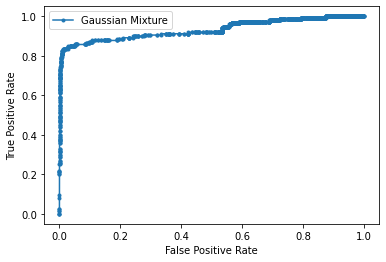

In [98]:
p_gm_6 = gm6.score_samples(X_test) #score_samples will compute the weighted log probabilities for each sample

for i in [-40,-10,1, 10, 100]: 
   mn_gm_6 = sorted(p_gm_6)[i] #We sort the points by probability
   precision_6 = precision_score(y_test, p_gm_6 < mn_gm_6) # compare y_val labels to our picks using precision
   recall_6 = recall_score(y_test, p_gm_6 < mn_gm_6) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision_6,' and the recall is ', '%.3f' % recall_6) 

#Plotting graph for ROC curve
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm_6)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [99]:
print(classification_report(y_test, p_gm_6 < mn_gm_6))
print ("AUC of Final Gaussian Mixture-Model  = " , format(  roc_auc_score(y_test, 1-p_gm_6)  , ".3f")  )
print("F1 Score of Final Gaussian Mixture-Model  = " , format (f1_score(y_test, p_gm_6 < mn_gm_6), ".3f")  )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.57      0.39      0.46       147

    accuracy                           1.00     85443
   macro avg       0.78      0.69      0.73     85443
weighted avg       1.00      1.00      1.00     85443

AUC of Final Gaussian Mixture-Model  =  0.934
F1 Score of Final Gaussian Mixture-Model  =  0.462


In [100]:
# Creating Confusion Matrix
conf_matrix = confusion_matrix(y_test, p_gm_6 < mn_gm_6)
print(conf_matrix)

[[85253    43]
 [   90    57]]


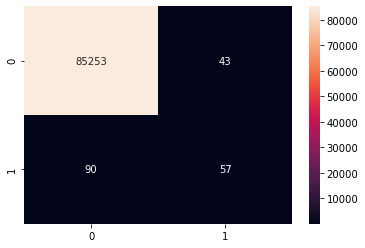

In [101]:
plot = sns.heatmap(conf_matrix, annot=True, fmt = 'g')